In [1]:
import pandas as pd

In [15]:
use_cols = ['loan_amnt', 'grade', 'int_rate', 'annual_inc', 'loan_status']

In [18]:
x = pd.read_csv("Python Project/accepted_2007_to_2018Q4.csv", usecols=use_cols, nrows=100000, low_memory=False)

In [21]:
x.head(10)

,loan_amnt,int_rate,grade,annual_inc,loan_status
0,3600.0,13.99,C,55000.0,Fully Paid
1,24700.0,11.99,C,65000.0,Fully Paid
2,20000.0,10.78,B,63000.0,Fully Paid
3,35000.0,14.85,C,110000.0,Current
4,10400.0,22.45,F,104433.0,Fully Paid
5,11950.0,13.44,C,34000.0,Fully Paid
6,20000.0,9.17,B,180000.0,Fully Paid
7,20000.0,8.49,B,85000.0,Fully Paid
8,10000.0,6.49,A,85000.0,Fully Paid
9,8000.0,11.48,B,42000.0,Fully Paid


In [22]:
x['is_default'] = x['loan_status'].apply(lambda status: 1 if status == 'Charged Off' else 0)

In [23]:
default_rate_by_grade = x.groupby('grade')['is_default'].mean().sort_index()
print(default_rate_by_grade)

grade
A    0.051849
B    0.120207
C    0.198746
D    0.282974
E    0.346713
F    0.437534
G    0.506361
Name: is_default, dtype: float64


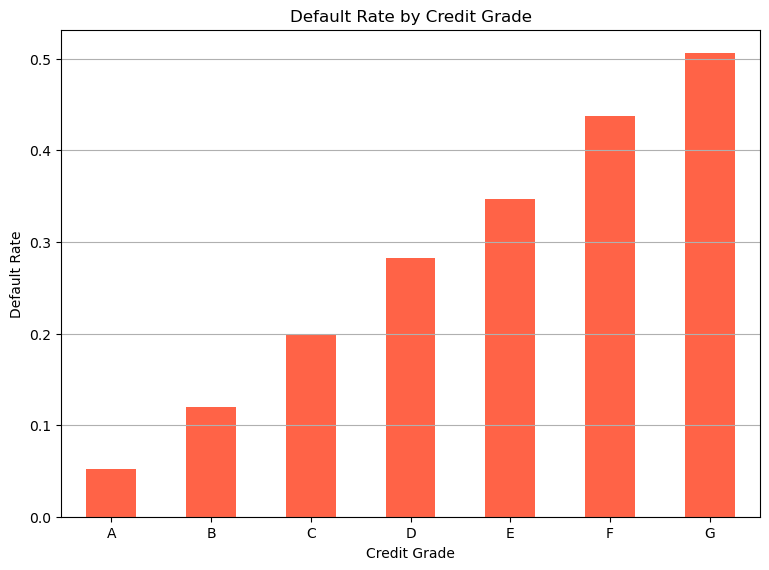

In [78]:
import matplotlib.pyplot as plt
import os
default_rate_by_grade.plot(kind='bar', color='tomato')
plt.title('Default Rate by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Default Rate')
plt.grid(axis='y')
plt.tight_layout()
ax = default_rate_by_grade.plot(kind='bar', color='tomato', figsize=(8, 6))
ax.set_title('Default Rate by Credit Grade')
ax.set_xlabel('Credit Grade')
ax.set_ylabel('Default Rate')
ax.grid(axis='y')
plt.xticks(rotation=0)
fig = ax.get_figure()       # 关键：拿到当前图形对象
fig.savefig("Python Project/output/default_rate_by_grade.png")   # 保存到 output 文件夹


plt.show()

In [80]:
use_cols = ['annual_inc', 'loan_status']
df = pd.read_csv("Python Project/accepted_2007_to_2018Q4.csv",
                 usecols=use_cols,
                 nrows=100_000,
                 low_memory=False)

In [65]:
df['is_default'] = (df['loan_status'] == 'Charged Off').astype(int)

In [66]:
df['inc_quartile'] = pd.qcut(df['annual_inc'],4, labels=['Q1-Low', 'Q2', 'Q3', 'Q4-High'])

In [67]:
inc_default = (df
               .groupby('inc_quartile', observed=False)['is_default']
               .mean()
               .sort_index())

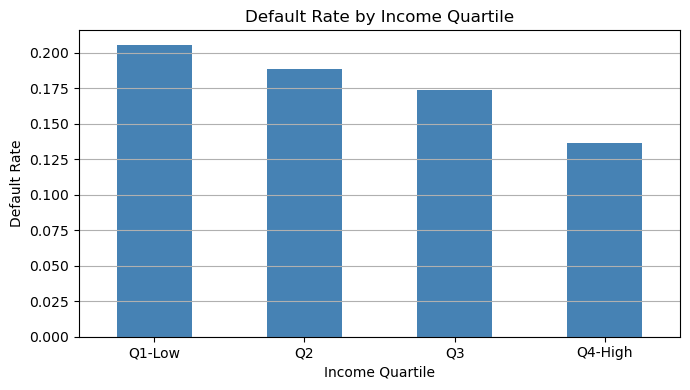

In [79]:
fig, ax = plt.subplots(figsize=(7, 4))
inc_default.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Default Rate by Income Quartile')
ax.set_xlabel('Income Quartile')
ax.set_ylabel('Default Rate')
ax.grid(axis='y')
plt.xticks(rotation=0)
fig.tight_layout() 

In [82]:
os.makedirs("Python Project/output", exist_ok=True)
fig.savefig("Python Project/output/default_rate_by_income.png")

plt.show()

In [84]:
ordered_grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
rate_by_grade = (x.groupby('grade')['int_rate']
                   .mean()
                   .reindex(ordered_grades))


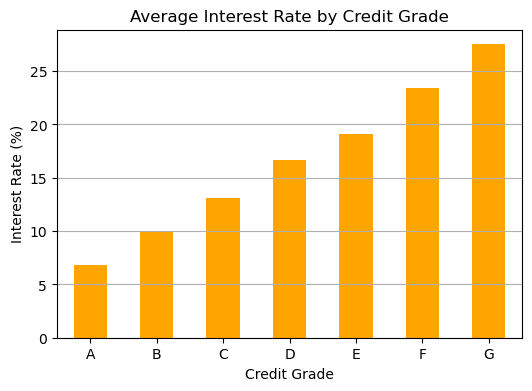

In [88]:
fig, ax = plt.subplots(figsize=(6, 4))
rate_by_grade.plot(kind='bar', color='orange', ax=ax)
plt.xticks(rotation=0)
ax.set_title('Average Interest Rate by Credit Grade')
ax.set_xlabel('Credit Grade')
ax.set_ylabel('Interest Rate (%)')
plt.xticks(rotation=0, ha='center')
ax.grid(axis='y')


In [91]:
os.makedirs("Python Project/output", exist_ok=True)
fig.tight_layout()
fig.savefig("Python Project/output/int_rate_by_grade.png")
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.api.types import CategoricalDtype

In [96]:
grade_order = ['A','B','C','D','E','F','G']
cat_type = CategoricalDtype(categories=grade_order, ordered=True)
x['grade'] = x['grade'].astype(cat_type)

Text(0.5, 0.98, '')

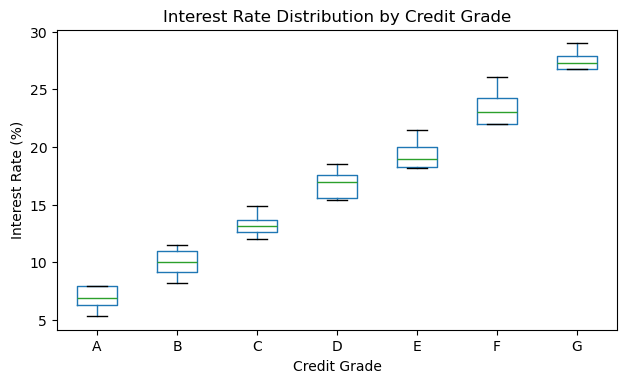

In [100]:
fig, ax = plt.subplots(figsize=(7,4))
x.boxplot(column='int_rate',
          by='grade',
          ax=ax,
          grid=False,
          showfliers=False)
ax.set_title('Interest Rate Distribution by Credit Grade')
ax.set_xlabel('Credit Grade')
ax.set_ylabel('Interest Rate (%)')
plt.suptitle('')

In [102]:
os.makedirs("Python Project/output", exist_ok=True)
fig.tight_layout()
fig.savefig("Python Project/output/int_rate_boxplot_by_grade.png")
plt.show()

In [109]:
use_cols = ['loan_amnt', 'loan_status']
df = pd.read_csv("Python Project/accepted_2007_to_2018Q4.csv",
                 usecols=use_cols,
                 nrows=100_000,
                 low_memory=False)

In [107]:
df['is_default'] = (df['loan_status'] == 'Charged Off').astype(int)

In [110]:
bins   = [0, 10_000, 20_000, 35_000, df['loan_amnt'].max()]
labels = ['≤10k', '10–20k', '20–35k', '>35k']

In [116]:
max_amt = df['loan_amnt'].max()
bins   = [0, 10_000, 20_000, 35_000, max_amt + 1]
labels = ['≤10k', '10–20k', '20–35k', '>35k']
df['loan_bucket'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, right=True)

In [120]:
df['is_default'] = (df['loan_status'] == 'Charged Off').astype(int)
default_rate_by_bucket = (
    df.groupby('loan_bucket', observed=False)['is_default']
      .mean()                        
      .reindex(labels)              
)
print(default_rate_by_bucket) 

loan_bucket
≤10k      0.157770
10–20k    0.186249
20–35k    0.187394
>35k           NaN
Name: is_default, dtype: float64


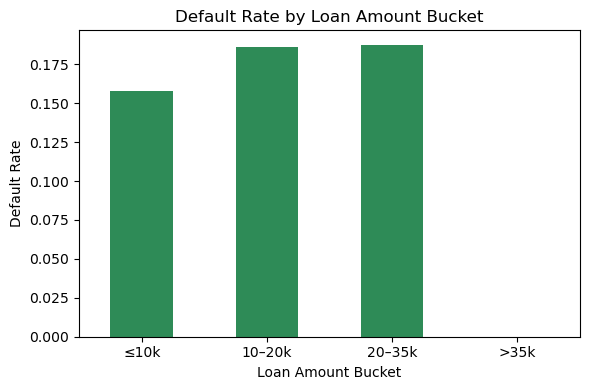

In [121]:
import matplotlib.pyplot as plt, os
fig, ax = plt.subplots(figsize=(6,4))
default_rate_by_bucket.plot(kind='bar', color='seagreen', ax=ax)
ax.set_title('Default Rate by Loan Amount Bucket')
ax.set_xlabel('Loan Amount Bucket')
ax.set_ylabel('Default Rate')
plt.xticks(rotation=0, ha='center')
os.makedirs('Python Project/output', exist_ok=True)
fig.tight_layout()
fig.savefig('Python Project/output/default_rate_by_loan_amt.png')
plt.show()